
# Project: Investigate a TMDb (The Movie Database) dataset

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This data set contains information of about 10,000 movies, collected from The Movie Databse(TMDb). 
It contains information regarding the cast, director, production company, release date, revenue, ratings, genre, playtime and more. 

 

**Questions for research**
- Which are the most popular, and least popular genres based on the number of movies released in 10 year periods from 1960 - 2015
- How have the user ratings for popoular genres changed over these periods, keeping in mind the the overall rating of movies falling under the studied genres, in those particular periods. 
- How have the user ratings for popular genres changed over these periods, keeping in mind the user average user sentiment for that particular genre over 50 years. 

>Dependent Variable:
YEARBINS

>a : 1960-1969
b : 1970-1979
c : 1980-1989
d : 1990-1999
e : 2000-2009
f : 2010-2019

>Independent Variables:
>Ratings of popular genres over yearbins. 






In [18]:
#import statements for packages used

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import time


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [19]:
#Load Data and print few lines
tmdb_df = pd.read_csv('tmdb-movies.csv')
print tmdb_df.head()
print len(tmdb_df) #1086


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

######

PLAYTIME

######

In [20]:
df=tmdb_df


In [21]:


def splitstringtoset(string):
    newset = set()
    if isnan(string):
            return string
    
    else:
        for q in [x.strip() for x in string.split('|')]:
            newset.add(q)
    return newset

df.genres = df.genres.apply(splitstringtoset)

######

PLAYTIME

######

In [22]:
#Operations to inspect data types and look for instances of missing or possibly errant data.
df = tmdb_df

#Checking for duplicate rows
print df[df.duplicated(['id'], keep=False)]  #row 2089 and 2090 have same content . id = 42194



         id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline     ...       \
2089  Dwight H. Little  Survival is no game     ...        
2090  Dwight H. Little  Survival is no game     ...        

                                               overview runtime  \
2089  In the year of 2039, after World Wars destroy ...      92   
2090  In the year of 2039, after World Wars destroy ...      92   

                                                 genres  \
2089  {Drama, Action, Science Fiction, Thriller, Crime}   
2090  {Drama, Action, Science Fiction, Thriller, Crime}   

        productio

In [23]:
#to check for NaN condition
def isnan(f):
    return isinstance(f, float) and f!=f

def iszero(q):
    if isnan(q):
        return False
    if q ==0:
        return True
    else:
        return False
    

In [24]:
#check if vote_average has NaN or 'zero' values

assert len(df[df.vote_average.apply(isnan)]) == 0
assert len(df[df.vote_average.apply(iszero)]) == 0

In [25]:
#Checking datatype for cast, director, keywords, genres, production companies

print type(df['cast'][0])
print type(df['director'][0])
print type(df['keywords'][0])
print type(df['genres'][0])
print type(df['production_companies'][0])

#printing and seeing
print df['genres'][0] # String with '|' as delimiter. 

#Checking if nans exist in these columns and printing occurences of nans in each column. 
print len(df[df.cast.apply(isnan)])
print len(df[df.director.apply(isnan)])
print len(df[df.keywords.apply(isnan)])
print len(df[df.genres.apply(isnan)])
print len(df[df.production_companies.apply(isnan)])



<type 'str'>
<type 'str'>
<type 'str'>
<type 'set'>
<type 'str'>
set(['Action', 'Science Fiction', 'Adventure', 'Thriller'])
76
44
1493
23
1030


In [26]:
#checking revenue adj and budget adj for zeros and nans

print len(df[df.revenue_adj.apply(isnan)]) == 0
print len(df[df.budget.apply(isnan)]) == 0

print len(df[df.revenue_adj.apply(iszero)])
print len(df[df.budget.apply(iszero)])


True
True
6016
5696


We observe that:

- The original datafram has a length of 1086 and 21 columns. 
- Row 2089 and 2090 are repeating. id = 42194.
- Cast, director, keywords, genres, production company. These columns have string types, with '|' as delimiter. Some of the column entires are NaN values
- Revenue adjusted and budget adjusted have no nans, but have zero values. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Performing cleaning steps)

>- Deleting duplicate row 
>- Changing Cast, Director, Keywords, Genres, Production Company column values to type set; with each value extracted out from string, and white spaces removed, and added to the set. 
>-

Add yearbin column
- a: 1960 - 1969
- b: 1970 - 1979
- c: 1980 - 1989
- d: 1990 - 1999
- e: 2000 - 2009
- f: 2010 - 2015

In [27]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#delete duplicate row
#delete 2090
df.drop(2090, inplace=True) #row has been deleted.
len(df)  #new length - 10865


10865

In [29]:
#cast, director, keywords, genres, production companies --> make into set, with each word extracted and 
#white spaces dropped
    

def splitstringtoset(string):
    newset = set()
    if isnan(string):
            return string
    
    else:
        for q in [x.strip() for x in string.split('|')]:
            newset.add(q)
    return newset

In [30]:
#check if release_year has nans
assert len(df[df.release_year.apply(isnan)]) == 0 # returned 0rows x 24 columns --> no nan values

#new column - year_bin a,b,c,d,e,f 
def yearbins(year):
    
    if 1960 <= year <= 1969:
        return 'a'
    if 1970 <= year <= 1979:
        return 'b'
    if 1980 <= year <= 1989:
        return 'c'
    if 1990 <= year <= 1999:
        return 'd'
    if 2000 <= year <= 2009:
        return 'e'
    if 2010 <= year <= 2019:
        return 'f'

df['year_bin']=df.release_year.apply(yearbins)

In [31]:
#Change all zeros to NaN values in profit_adj and revenue_adj
df.budget_adj = df.budget_adj.replace(0, np.nan)
df.revenue_adj = df.revenue_adj.replace(0, np.nan)

#Check if zeros exist

print len(df[df.revenue_adj.apply(iszero)])
print len(df[df.budget_adj.apply(iszero)])

0
0


In [32]:
#add new column - 'profit_adj' : only if revenue_adj and budget_adj ! = 0, should the calc be done
#therefore change all zeros to nans

df['profit_adj']=df.revenue_adj.sub(df.budget_adj, axis=0)

#add new column - 'roi_adj'
df['roi_adj']=(df.profit_adj.div(df.budget_adj, axis=0))


# replace 0 values with nans in profit_adj and roi_adj
df.profit_adj = df.profit_adj.replace(0, np.nan)
#df.roi_adj = df.roi_adj.replace(0, np.nan)



<a id='eda'></a>
## Exploratory Data Analysis


### Which are the most popular, and least popular genres based on the number of movies in genres appearing in our database from 1960 - 2015

In [33]:
# populate allgenres --> set

allgenres=set()

def splitset(set):

    if(isnan(set)):
        pass

    else:
        for x in set:
            allgenres.add(x)
            

 #all genres of movives
df.genres.apply(splitset) #populating all genres

print allgenres
len(allgenres)





set(['Mystery', 'Romance', 'History', 'Family', 'Fantasy', 'Horror', 'Crime', 'Drama', 'Science Fiction', 'Animation', 'Music', 'Adventure', 'Foreign', 'Action', 'TV Movie', 'Comedy', 'Documentary', 'War', 'Thriller', 'Western'])


20

In [34]:
#Most Popular and Least popular genres,based on total number of movies in them 
totalcount = {}

for i in list(allgenres): #for each genre we are analysing

    def ifinset(sett):
        if(isnan(sett)):
            #print(sett)
            return False
        for eachgenre in sett:
            if eachgenre == i:
                return True
        return False
    totalcount[i] = len(df[df.genres.apply(ifinset)])

    
#most popular 5 and least popular 5 genres
print pd.to_numeric(pd.Series(totalcount.values(), index = totalcount.keys()).sort_values(ascending = False)).nlargest(5)
print '\n'
print pd.to_numeric(pd.Series(totalcount.values(), index = totalcount.keys()).sort_values(ascending = False)).nsmallest(5)

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64


Western     165
TV Movie    167
Foreign     188
War         270
History     334
dtype: int64


The most popular genres are Drama, Comedy, Thriller, Action, Romance.
The least popular genres are Western, TV Movie, Foreign, War, History

In [35]:
#Taking most popular 7 genres and adding it into a set for analysis 

genresbeingstudied = set(pd.to_numeric(pd.Series(totalcount.values(), index = totalcount.keys()).\
                                       sort_values(ascending = False)).nlargest(7).index.values)




print genresbeingstudied


set(['Romance', 'Horror', 'Drama', 'Adventure', 'Action', 'Comedy', 'Thriller'])


### How have the user ratings, and the profits for movies in popoular genres changed over the years, keeping in mind the the overall rating of movies falling under the studied genres, in those particular periods. 

In [36]:
#Creating two dataframes. 
#gyr_df = ratings of each genres, in each of the yearbins

index = list(genresbeingstudied)
columns = ['a','b','c','d','e','f']
gyr_df = pd.DataFrame(index = index, columns=columns)
profit_df = pd.DataFrame(index = index, columns=columns)
roi_df = pd.DataFrame(index = index, columns=columns)


In [37]:
#for gyr_df --> the ratings for genres in each yearbins
# we are filling values 
gb_yearbin= df.groupby('year_bin')

for yearbin, yearbin_df in gb_yearbin:
    
    for i in list(genresbeingstudied): #for each genre we are analysing
        
        def ifinset(sett):
            if(isnan(sett)):
                #print(sett)
                return False
            for eachgenre in sett:
                if eachgenre == i:
                    return True
            return False
        
        

        #filling gyr_df & profit_df
        gyr_df.loc[i,yearbin] = np.nanmean(yearbin_df[yearbin_df.genres.apply(ifinset)]['vote_average']) 
        profit_df.loc[i,yearbin] = np.nanmean(yearbin_df[yearbin_df.genres.apply(ifinset)]['profit_adj'])
        roi_df.loc[i,yearbin] = (yearbin_df[yearbin_df.genres.apply(ifinset)]['roi_adj']).mean()
        #ratings of genres being studied 


#roi_df

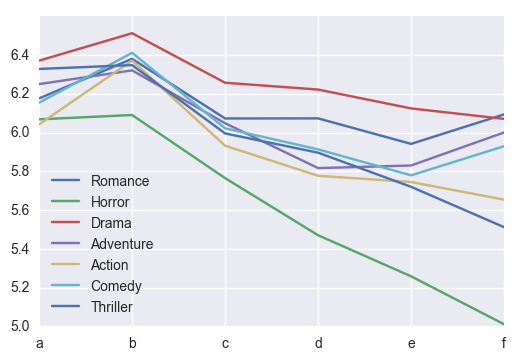

In [44]:
gyr_df.transpose().plot(kind='line')

a    6.251632
b    6.369915
c    6.055193
d    5.984155
e    5.875045
f    5.797906
dtype: float64

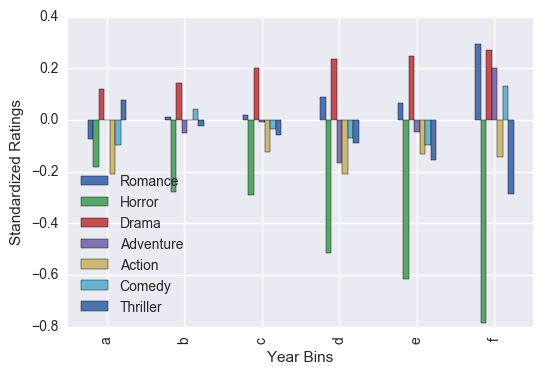

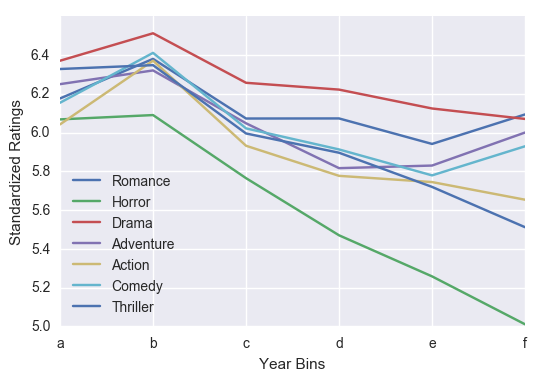

In [47]:
#Normalize with avg rating of movies from the (genres being studied) in each yearbin -->
index = list(genresbeingstudied)
columns = ['a','b','c','d','e','f']
#genre yearbin rating
avg_rating_of_allgenresbeingstudied_in_eachyearbin = pd.Series(index=columns)


for yearbin, yearbin_df in gb_yearbin:
    
   
    def ifbeingstudied(set):
        if(isnan(set)):
            #print(set)
            return False
        for eachgenre in set:
            if eachgenre in genresbeingstudied:
                return True
        return False
        
    avg_rating_of_allgenresbeingstudied_in_eachyearbin[yearbin] =\
    np.nanmean(yearbin_df[yearbin_df.genres.apply(ifbeingstudied)]['vote_average'])



rating_plot = (gyr_df - avg_rating_of_allgenresbeingstudied_in_eachyearbin).transpose().plot.bar()

rating_plot.set(xlabel="Year Bins", ylabel="Standardized Ratings")

gyr_plot =gyr_df.transpose().plot()
gyr_plot.set(xlabel="Year Bins", ylabel="Standardized Ratings")
avg_rating_of_allgenresbeingstudied_in_eachyearbin

,a,b,c,d,e,f
Romance,2.69596e+08,1.44507e+08,9.95506e+07,1.09044e+08,5.92654e+07,5.82395e+07
Horror,1.23951e+08,3.54912e+08,4.18438e+07,3.86365e+07,5.06629e+07,4.3827e+07
Drama,1.95884e+08,2.37432e+08,8.23946e+07,8.34065e+07,4.54365e+07,4.46998e+07
Adventure,3.73162e+08,3.44008e+08,1.74246e+08,1.35179e+08,1.59811e+08,2.36665e+08
Action,2.86215e+08,2.73246e+08,1.48462e+08,1.07151e+08,1.04182e+08,1.42365e+08
Comedy,2.44666e+08,1.89425e+08,1.0124e+08,8.49641e+07,6.94427e+07,7.67994e+07
Thriller,3.34389e+08,2.94991e+08,7.42285e+07,9.65411e+07,5.95091e+07,6.88859e+07


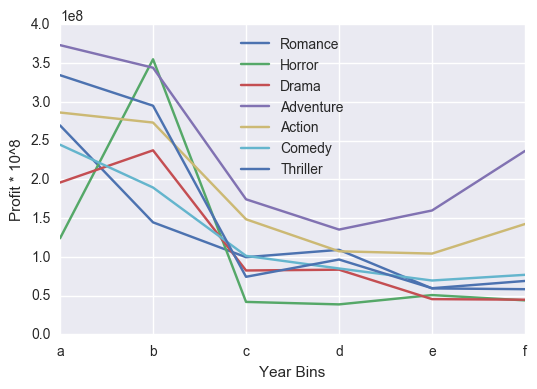

In [49]:
#Plotting for profit_adj 

profit_plot = profit_df.transpose().plot()
profit_plot.set(xlabel='Year Bins', ylabel='Profit * 10^8')
profit_df

We see that profits for adventure has almost always been higher than the others. Aventure movie profits are on the rise 

***How have the user ratings for popular genres changed over these periods, keeping in mind the user average user sentiment for that particular genre over 50 years***


In [40]:
#find average rating of the genresbeingstudied from 1960 - 2015


avg_rating_of_genresbeingstudied_dict = {}

for i in list(genresbeingstudied):
    #print i
    
    def ifinset(sett):
            if(isnan(sett)):
                #print(sett)
                return False
            for eachgenre in sett:
                if eachgenre == i:
                    return True
            return False
    
    avg_rating_of_genresbeingstudied_dict[i]=(np.nanmean(df[df.genres.apply(ifinset)]['vote_average']))
    


#putting into Series

avg_rating_of_genresbeingstudied_series = pd.Series(avg_rating_of_genresbeingstudied_dict.values(), index = avg_rating_of_genresbeingstudied_dict.keys())
avg_rating_of_genresbeingstudied_series

Drama        6.165546
Horror       5.337447
Romance      6.042874
Adventure    5.940585
Action       5.787752
Comedy       5.905167
Thriller     5.750671
dtype: float64

                  a         b          c           d          e          f
Action     0.254556  0.583323   0.144234  -0.0110484 -0.0431363  -0.134212
Adventure  0.309415  0.380195   0.107415   -0.124221  -0.110743  0.0596827
Comedy     0.248815  0.506308   0.116562  0.00785837  -0.126068  0.0241877
Drama      0.205287  0.347006  0.0914278   0.0562635 -0.0411499 -0.0950713
Horror     0.730639  0.752938   0.427259    0.132395 -0.0795953  -0.326974
Romance    0.133246  0.337518  0.0296976   0.0301467  -0.101484   0.050834
Thriller   0.577454  0.597302   0.244714    0.145289 -0.0309785  -0.239065


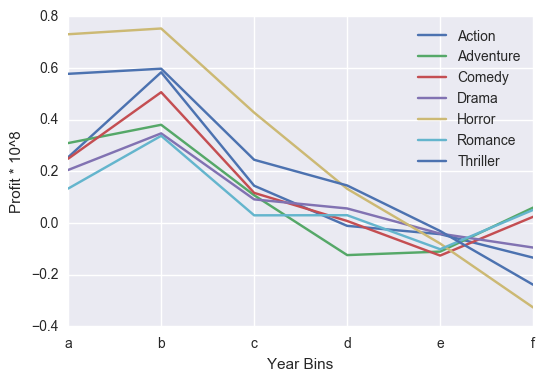

In [48]:

stdrating_plot =gyr_df.loc[list(genresbeingstudied)].sub(avg_rating_of_genresbeingstudied_series, axis =0).transpose().plot()
stdrating_plot.set(xlabel='Year Bins', ylabel='Profit * 10^8')
=gyr_df.loc[list(genresbeingstudied)].sub(avg_rating_of_genresbeingstudied_series, axis =0)
#This is after the avg rating of each genres has been normallized with all ratings of that genre across all years

We see that Romance comedy and adventure have been rising over the last 20 years. 

<a id='conclusions'></a>
## Conclusions


We see that the most popular genres according to movies appearing in the database are : 
Drama Comedy Thriller Action and Romance.
The least popular being : Western, TV Movie, and Foreign. 

We see that over the years, rating for horror movies have been on a constant decline.
Adventure, Comedy and Romance movies' ratings have been on the rise from 1990   


We see that profit for adventure movies are always tend to stand out from the rest. Also in the last 20 years, profits for adventure movies have been climbing. 

Clearly, adventure seems to be the top most genre according to popularity, earnings and recent growth. 